## 6.5 Machine Learning Part 2
#### This script contains the following:
#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv (r"C:\Users\kelly\OneDrive\Desktop\Campsite Prepared Data\up_to_date_data.csv")

In [4]:
df.shape

(150, 15)

In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0,longitude,latitude,name,park_type,dates_open,comments,num_sites,elevation,amenities,state,nearest_town_distance,nearest_town_bearing,city
0,51,1091,-88.324,46.325,Deer Lake - State Forest,SF,all year,open all year but snow may block,12,1569.0,NH NR,MI,15.7,N,Crystal Falls
1,56,1196,-88.402,46.531,King Lake - Copper County State Forest,SF,all year,open all year but snow may block,6,1662.0,NH NR,MI,6.5,E,Covington
2,163,2119,-103.363,48.279,Epping RV Park,CP,early may-mid oct,may be full - check,12,2203.0,WES DP,ND,0.3,W,Epping
3,261,2261,-101.327,47.615,Sportsmens Centennial Park,CP,early may-late sep,swim,121,1869.0,E FT DW SH,ND,4.8,SE,Garrison
4,335,2374,-98.077,41.987,Elgin City Park,CP,early may-mid oct,swim,8,1926.0,WES DP FT DW SH L$,NE,0.4,NE,Elgin


In [6]:
#Drop columns 'Unnamed:0.1', 'Unnamed:0, 'name', 'park_type', 'dates_open', 'comments', 'amenities', 'state', 'nearest_town_bearing', 'city', 'longitude', 'latitude'

df_2 = df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0', 'name', 'park_type', 'dates_open', 'comments', 'amenities', 'state', 'nearest_town_bearing', 'city', 'longitude', 'latitude'])

In [7]:
df_2.columns

Index(['num_sites', 'elevation', 'nearest_town_distance'], dtype='object')

### 2. The elbow technique

In [8]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [9]:
score = [kmeans[i].fit(df_2).score(df_2) for i in range(len(kmeans))] 

score

C:\Users\kelly\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[-935800273.3722665,
 -269770114.2357828,
 -103957272.11055267,
 -52273840.49908222,
 -39291561.58999663,
 -26723817.079837095,
 -20075669.25130159,
 -15351339.589321123,
 -12172387.33714022]

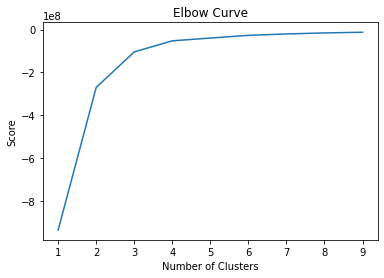

In [10]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In this example, there's a large jump from two to three on the x-axis and a smaller jump from 3 to 4, but after that, the curve straightens out. This means that the optimal count for your clusters is four.

In [11]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [12]:
# Fit the k-means object to the data.

kmeans.fit(df_2)

KMeans(n_clusters=4)

In [13]:
df_2['clusters'] = kmeans.fit_predict(df_2)

In [14]:
df_2.head()

,num_sites,elevation,nearest_town_distance,clusters
0,12,1569.0,15.7,2
1,6,1662.0,6.5,2
2,12,2203.0,0.3,2
3,121,1869.0,4.8,2
4,8,1926.0,0.4,2


In [15]:
df_2

,num_sites,elevation,nearest_town_distance,clusters
0,12,1569.0,15.7,2
1,6,1662.0,6.5,2
2,12,2203.0,0.3,2
3,121,1869.0,4.8,2
4,8,1926.0,0.4,2
...,...,...,...,...
145,238,1764.0,10.0,2
146,68,2505.0,7.3,2
147,34,3314.0,0.2,2
148,15,4500.0,10.1,0


In [16]:
df_2.to_csv(r'C:\Users\kelly\OneDrive\Desktop\Campsite Prepared Data/data_with_clusters.csv')

In [20]:
df_2['clusters'].value_counts()

2    47
0    42
3    37
1    24
Name: clusters, dtype: int64

In [15]:
df_2.to_csv(r'C:\Users\kelly\OneDrive\Desktop\Campsite Prepared Data/data_with_clusters')

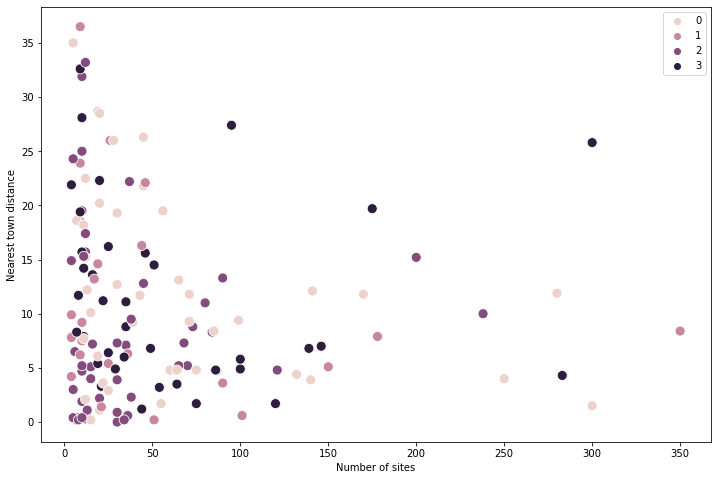

In [22]:
# Plot the clusters for the "Number of sites" and "Nearest town distance" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['num_sites'], y=df_2['nearest_town_distance'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Number of sites') 
plt.ylabel('Nearest town distance') 
plt.show()

The cluster numbers were pretty much evenly distributed and the same number in each cluster, however, they didn't show up as a true cluster on the scatterplot.  I'm not sure why that happened.  The number '2' cluster has the most populated cluster.  It shows the number of sites in relation to being closest to town.  They seem to be evenly distributed from towns that are 0-15 miles from a site.  The number cluster '0' has the next highest amount of sites closest to town.  They have a few that are the most number of sites available and are closer to a town.  The '3' cluster has has a variety of of information.  There seem to be quite a few that have a smaller amount of sites and are closest to town.  There are also some that have a higher number of sites and are farther away from town.  This cluster is really spread out.  The '1' cluster has the smallest amount in the cluster.  It has the most sites and closest to town indicator.  Most of this cluster seems to be concentrated with smaller number of sites and closest to town.  I think it is safe to say that most campsites with fewer sites are located closer to a town.

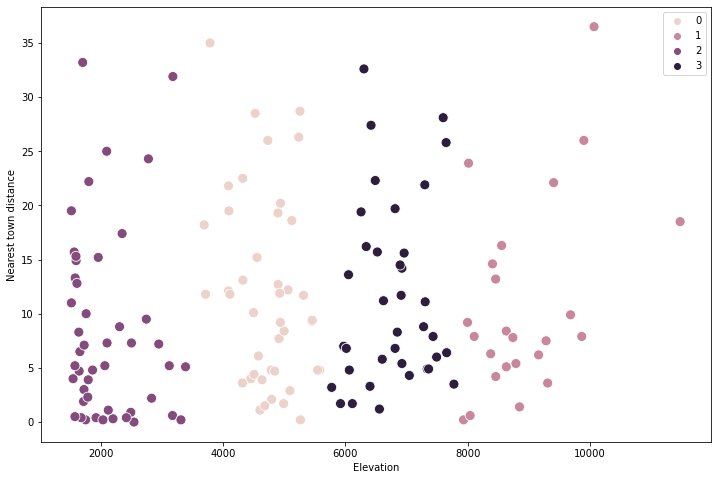

In [23]:
# Plot the clusters for the "Elevation" and "Nearest town distance" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['elevation'], y=df_2['nearest_town_distance'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Elevation') 
plt.ylabel('Nearest town distance') 
plt.show()

This scatterplot shows the elevation of a campsite in comparison to how close it is to the nearest town.  This scatterplot looks more realistic and has grouped the dots more like true clusters.  Each cluster seems to be distributed about the same.  It shows that the lower the elevation, the closer a site is located to a town.  The higher the elevation, the farther it is from town.  It might make sense that a higher elevated site wouldn't be close to a town.  Many towns wouldn't be built on a higher elevation piece of land.  I am still interested to see which states have the higher elevation sites and which states have the lower elevation sites.  I would think the upper half of the US would have the higher elevated sites.  I would still like to find the answer to that question.  I would also like to know which states have the most/least campsites available.

In [25]:
df_2.loc[df_2['clusters'] == 2, 'cluster'] = 'dark purple'
df_2.loc[df_2['clusters'] == 1, 'cluster'] = 'purple'
df_2.loc[df_2['clusters'] == 0, 'cluster'] = 'pink'

In [28]:
df_2.groupby('cluster').agg({'num_sites':['mean', 'median'], 
                         'nearest_town_distance':['mean', 'median'], 
                         'elevation':['mean', 'median']})

num_sites        nearest_town_distance           elevation  \
                  mean median                  mean median         mean   
cluster                                                                   
dark purple  37.042553   15.0              8.434043    5.2  2100.000000   
pink         64.738095   41.0             11.947619   10.9  4731.571429   
purple       51.083333   20.0             10.945833    7.9  8922.250000   

                     
             median  
cluster              
dark purple  1869.0  
pink         4793.5  
purple       8686.0

-The pink cluster has the best stats in almost all the categories.  The median number of sites is 41, which is higher than the other two.  It also has the average distance to the nearest town.  It also has the average distance to town.

-The average distance to the nearest town is varied between the three clusters.  It ranges from 5 to 10 miles on average.

-The purple cluster seems to have a higher number of sites (not as much as the pink cluster) and also the highest average of elevation.  There are more sites with the higher elevation then I would have guessed.

-The dark purple has the lowest average of sites with the lowest elevation and is the closest to the nearest town.  I would think there would be a higher number of sites because of the lower elevation and distance to town.

-I think this data set is too small.  I would like other columns to explore.  In order to draw any real conclusions, I would need more information on campsites across the US.

-I do think it supports what I have been finding all along.  The closer the site is to town, the more campsites that are available.  The farther the campsite is to town, the higher the elevation.  The data has been consistent in showing these results.